In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
train_data = pd.read_csv('Training Dataset.csv')
test_data = pd.read_csv('Test Dataset.csv')
sample_submission = pd.read_csv('Sample_Submission.csv')

In [18]:
def preprocess_data(df):
    imputer = SimpleImputer(strategy='most_frequent')
    df['Gender'] = imputer.fit_transform(df[['Gender']])[:, 0]
    df['Married'] = imputer.fit_transform(df[['Married']])[:, 0]
    df['Dependents'] = imputer.fit_transform(df[['Dependents']])[:, 0]
    df['Self_Employed'] = imputer.fit_transform(df[['Self_Employed']])[:, 0]
    df['LoanAmount'] = imputer.fit_transform(df[['LoanAmount']])[:, 0]
    df['Loan_Amount_Term'] = imputer.fit_transform(df[['Loan_Amount_Term']])[:, 0]
    df['Credit_History'] = imputer.fit_transform(df[['Credit_History']])[:, 0]

    label_encoder = LabelEncoder()
    df['Gender'] = label_encoder.fit_transform(df['Gender'])
    df['Married'] = label_encoder.fit_transform(df['Married'])
    df['Education'] = label_encoder.fit_transform(df['Education'])
    df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])
    df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])
    if 'Loan_Status' in df.columns:
        df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])

    return df

In [19]:
train_data_processed = preprocess_data(train_data.copy())
test_data_processed = preprocess_data(test_data.copy())

In [20]:
train_data_processed['Dependents'] = train_data_processed['Dependents'].replace('3+', 3).astype(int)
test_data_processed['Dependents'] = test_data_processed['Dependents'].replace('3+', 3).astype(int)


In [21]:
train_data_processed['TotalIncome'] = train_data_processed['ApplicantIncome'] + train_data_processed['CoapplicantIncome']
test_data_processed['TotalIncome'] = test_data_processed['ApplicantIncome'] + test_data_processed['CoapplicantIncome']

train_data_processed['IncomeLoanRatio'] = train_data_processed['TotalIncome'] / train_data_processed['LoanAmount']
test_data_processed['IncomeLoanRatio'] = test_data_processed['TotalIncome'] / test_data_processed['LoanAmount']


In [22]:
X = train_data_processed.drop(columns=['Loan_ID', 'Loan_Status'])
y = train_data_processed['Loan_Status']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

print(f'Accuracy: {accuracy}\n')
print('Classification Report:\n', report)

Accuracy: 0.7886178861788617

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [23]:
kmeans = KMeans(n_clusters=2, random_state=42)
train_data_processed['Cluster'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

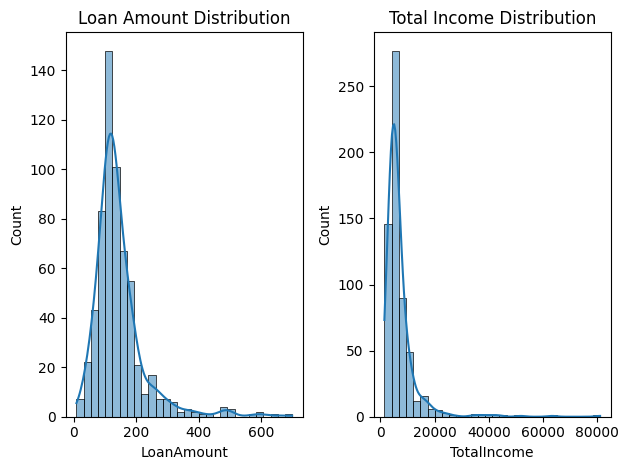

In [27]:
plt.subplot(1, 2, 1)
sns.histplot(train_data_processed['LoanAmount'], kde=True, bins=30)
plt.title('Loan Amount Distribution')

plt.subplot(1, 2, 2)
sns.histplot(train_data_processed['TotalIncome'], kde=True, bins=30)
plt.title('Total Income Distribution')

plt.tight_layout()
plt.show()

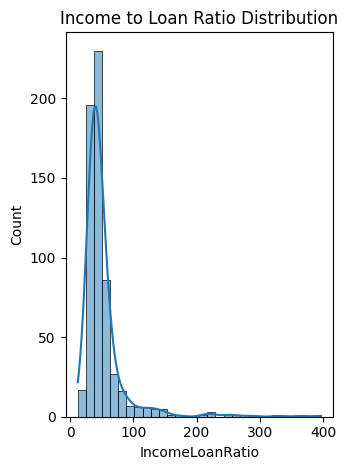

In [26]:
plt.subplot(1, 2, 2)
sns.histplot(train_data_processed['IncomeLoanRatio'], kde=True, bins=30)
plt.title('Income to Loan Ratio Distribution')

plt.tight_layout()
plt.show()